In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


In [54]:
attrition_df = pd.read_csv("Resources\HR-Employee-Attrition.csv")
attrition_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [18]:
# List the total number of columns in dataset.
attrition_df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
# Droping unnecessary columns : 'EmployeeCount' 'Over18' 'Education' 'StandardHours' 'StockOptionLevel' 
attrition_filtered_df = attrition_df.drop(columns=['EmployeeCount','Over18', 'Education', 'StandardHours', 'StockOptionLevel'])
attrition_filtered_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [44]:
# Finding number of rows with Attrition values as 'NO' 
no_attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] != 'Yes']
no_attrition_set


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,Life Sciences,8,4,Male,...,13,3,3,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Medical,10,3,Female,...,20,4,1,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,2061,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,2062,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2064,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,2065,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [45]:
# Finding the number of rows with attrition values as 'YES'
attrition_set= attrition_filtered_df[attrition_filtered_df['Attrition'] == 'Yes']
attrition_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Life Sciences,19,3,Male,...,14,3,2,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Life Sciences,27,3,Male,...,23,4,2,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Medical,31,2,Male,...,11,3,3,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Marketing,2023,4,Male,...,19,3,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Medical,2027,1,Male,...,14,3,2,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,Technical Degree,2032,4,Male,...,11,3,4,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Life Sciences,2044,2,Male,...,12,3,4,12,3,3,6,3,0,1


In [58]:
# check for any missing values.
attrition_filtered_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [150]:
attrition_filtered_df.describe().iloc[1:,:].style.background_gradient(cmap= 'Reds' )

,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,9.192517,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\Users\aksha\AppData\Local\Temp\ipykernel_36736\1777214158.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = attrition_filtered_df.corr()


<AxesSubplot:>

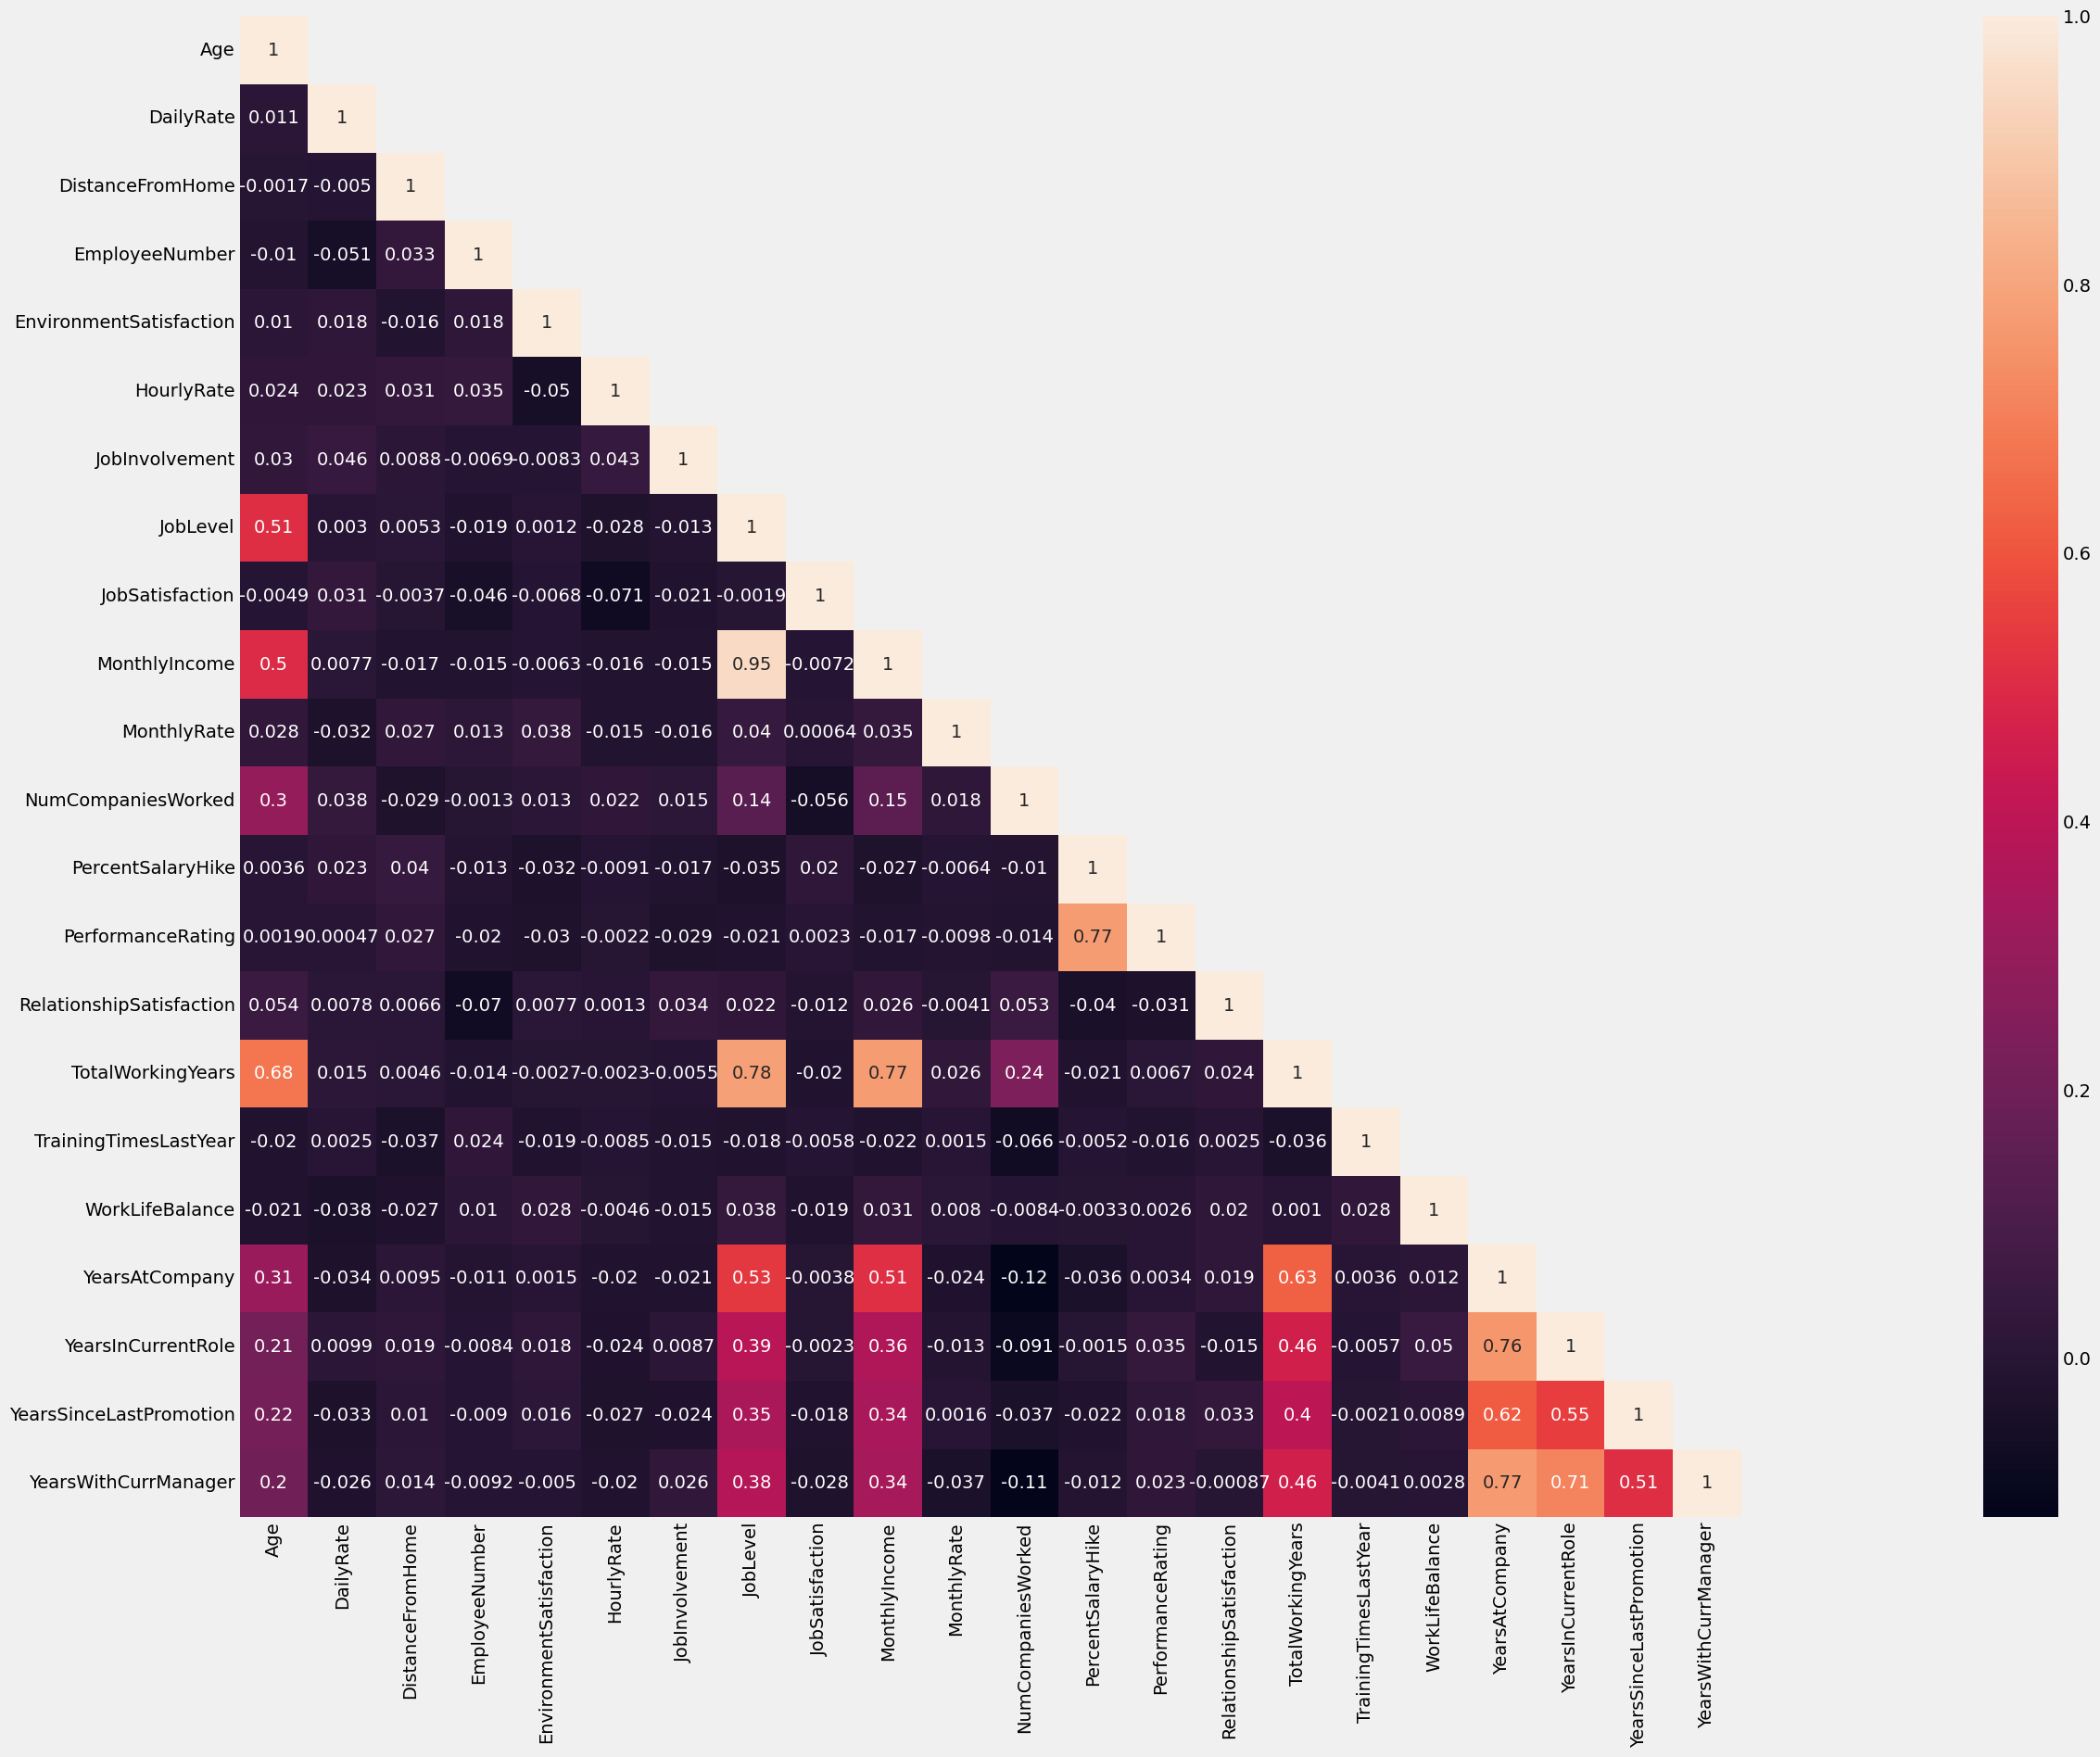

In [147]:
#Correlation
# plt.rcParams['figure.figsize']= (50,10)
# plt.style.use('fivethirtyeight')
# pd.set_option('max_columns', 100)
# sns.heatmap(attrition_df.corr(), cmap = 'Reds')
# plt.show()

cor_matrix = attrition_filtered_df.corr()
mask= np.array(cor_matrix)
mask[np.tril_indices_from(mask)]= False
fig= plt.gcf()
fig.set_size_inches(60,20)
sns.heatmap(data = cor_matrix, mask=mask, square= True, annot= True, cbar= True )


In [151]:
#Covariance 
attrition_filtered_df.cov()

C:\Users\aksha\AppData\Local\Temp\ipykernel_36736\2827822638.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition_filtered_df.cov()


,Age,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,83.455049,39.298434,-0.124873,-55.797199,0.101319,4.510422,0.193841,5.153276,-0.049285,2.141220e+04,...,0.121489,0.006276,0.528776,48.361684,-0.231093,-0.138695,17.423359,7.046750,6.373743,6.587332
DailyRate,39.298434,162819.593737,-16.308004,-12386.713294,8.095750,191.800350,13.246309,1.324944,13.604357,1.464113e+04,...,33.529204,0.068910,3.423048,45.570709,1.275892,-10.789322,-84.187085,14.520296,-43.206982,-37.957055
DistanceFromHome,-0.124873,-16.308004,65.721251,160.649502,-0.142451,5.130567,0.050667,0.047586,-0.032802,-6.493864e+02,...,1.193809,0.079300,0.057478,0.291951,-0.386118,-0.152094,0.472219,0.553521,0.261991,0.416715
EmployeeNumber,-55.797199,-12386.713294,160.649502,362433.299749,11.595582,430.551701,-2.950629,-12.341279,-30.705067,-4.202853e+04,...,-28.520432,-4.422436,-45.473775,-67.289749,18.320126,4.384426,-41.458396,-18.357800,-17.496817,-19.755358
EnvironmentSatisfaction,0.101319,8.095750,-0.142451,11.595582,1.194829,-1.107908,-0.006438,0.001466,-0.008179,-3.221042e+01,...,-0.126824,-0.011654,0.009059,-0.022905,-0.027283,0.021335,0.009761,0.071317,0.057040,-0.019496
HourlyRate,4.510422,191.800350,5.130567,430.551701,-1.107908,413.285626,0.620006,-0.626800,-1.599339,-1.511674e+03,...,-0.674252,-0.015930,0.029244,-0.369139,-0.224036,-0.066170,-2.438866,-1.775575,-1.750142,-1.459700
JobInvolvement,0.193841,13.246309,0.050667,-2.950629,-0.006438,0.620006,0.506319,-0.009948,-0.016853,-5.115948e+01,...,-0.044805,-0.007464,0.026386,-0.030634,-0.014071,-0.007348,-0.093097,0.022473,-0.055454,0.065951
JobLevel,5.153276,1.324944,0.047586,-12.341279,0.001466,-0.626800,-0.009948,1.225316,-0.002373,4.952417e+03,...,-0.140705,-0.008476,0.025901,6.737044,-0.025961,0.029574,3.626435,1.561913,1.262322,1.482250
JobSatisfaction,-0.049285,13.604357,-0.032802,-30.705067,-0.008179,-1.599339,-0.016853,-0.002373,1.216270,-3.715889e+01,...,0.080735,0.000914,-0.014850,-0.173208,-0.008217,-0.015161,-0.025693,-0.009209,-0.064728,-0.108830
MonthlyIncome,21412.198982,14641.125975,-649.386355,-42028.530023,-32.210416,-1511.673923,-51.159481,4952.416922,-37.158893,2.216486e+07,...,-469.860339,-29.082690,131.703156,28312.303770,-131.935513,102.053699,14833.730990,6205.846259,5233.677307,5780.054075


<AxesSubplot:xlabel='Attrition', ylabel='count'>

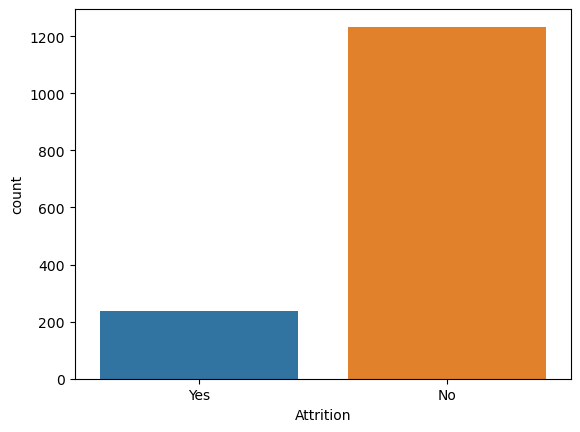

In [62]:
# Attrition vs Count  using countplot.
sns.countplot(x= 'Attrition', data= attrition_filtered_df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

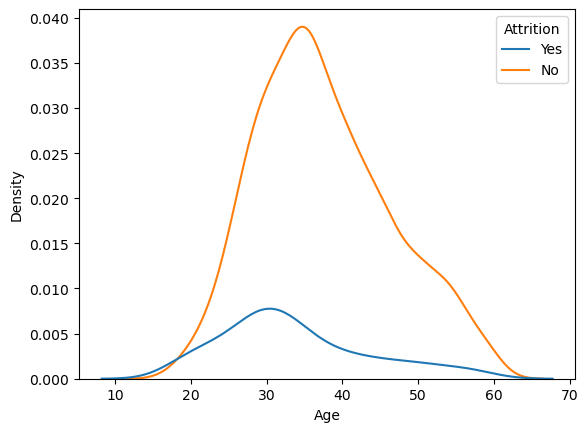

In [63]:
# Do Age plays major role in Attrition ? 
sns.kdeplot(data=attrition_filtered_df , x= 'Age', hue='Attrition')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

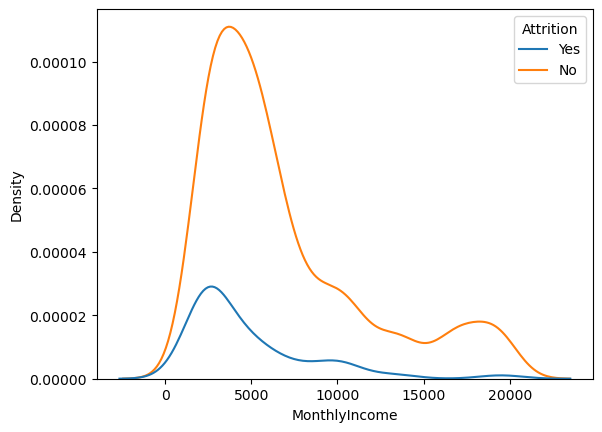

In [65]:
# Monthly Income vs Attrition density.
sns.kdeplot(data=attrition_filtered_df , x= 'MonthlyIncome', hue='Attrition')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

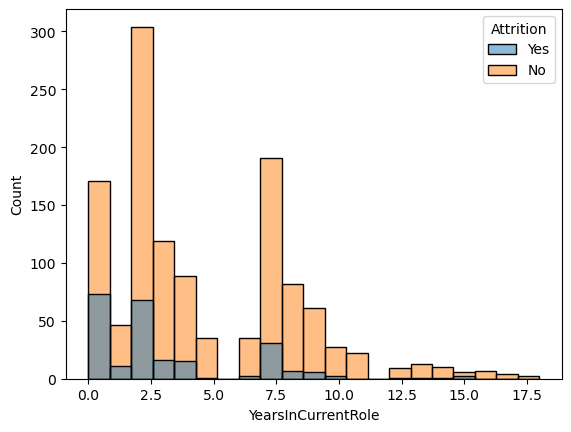

In [71]:
# Does experience helps people say longer in the company ?
sns.histplot(data= attrition_filtered_df, x='YearsInCurrentRole', hue='Attrition')


<AxesSubplot:xlabel='Gender', ylabel='Count'>

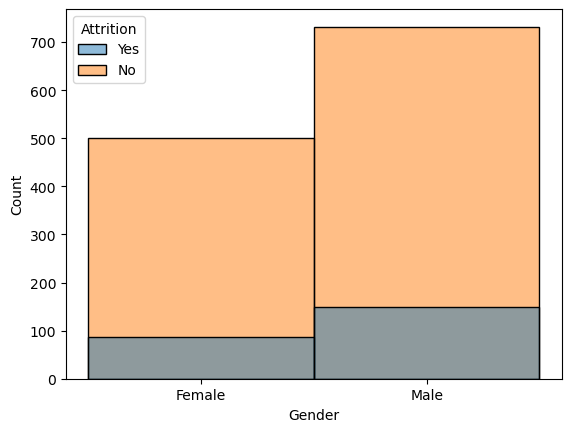

In [77]:
# Gender vs Attrition count
sns.histplot(data= attrition_filtered_df , x= 'Gender', hue='Attrition')


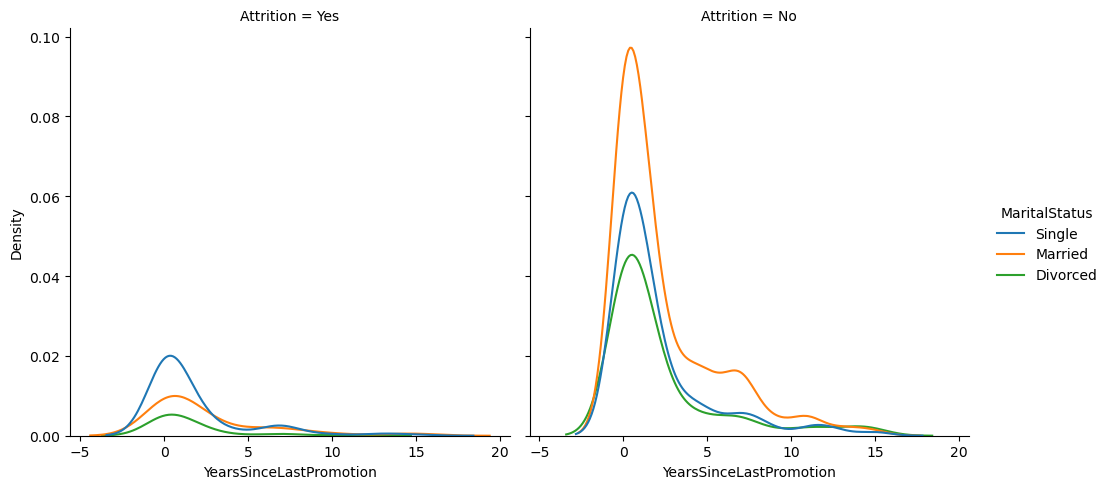

In [103]:
# Considering the Marital Status and Years since LastPromotion has any lead for employer leaving the company ?

#sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='Attrition', col= 'Gender', kind='kde')
sns.displot(data= attrition_filtered_df, x= 'YearsSinceLastPromotion', hue='MaritalStatus', col= 'Attrition', kind='kde')


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

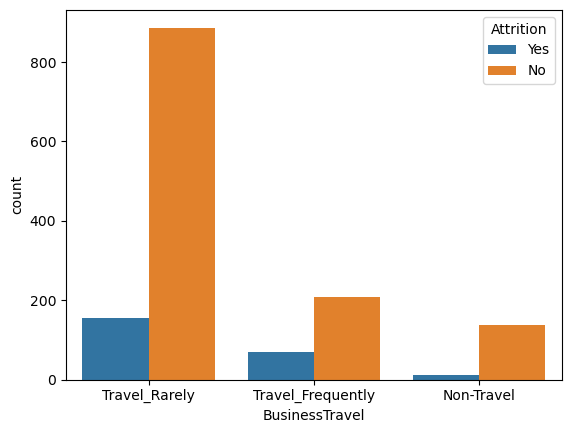

In [100]:
# Does Bussiness Travel has an impact Attrition ? 
sns.countplot(data= attrition_filtered_df, x='BusinessTravel', hue='Attrition')

In [123]:
attrition_filtered_df.Department.value_counts() 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

c:\Users\aksha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


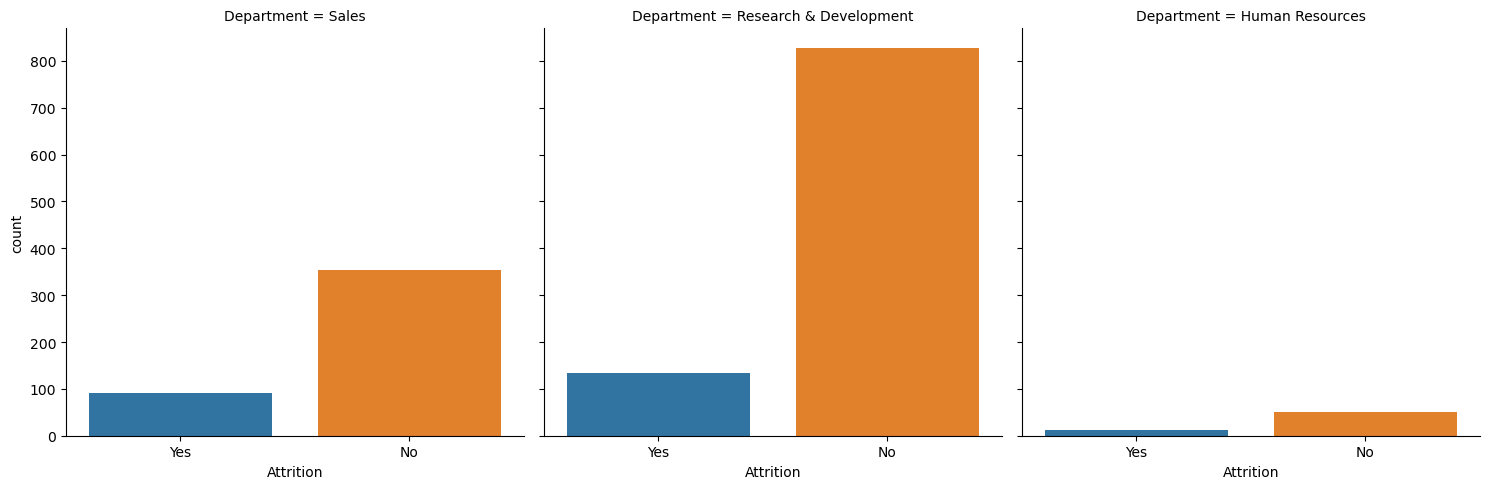

In [125]:
sns.factorplot(data= attrition_filtered_df, kind='count', x='Attrition', col= 'Department')

In [ ]:
pd.cross

In [59]:
# Finding columns with non-numerical values.
attrition_filtered_df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [104]:
#save the cleaned dataframe to csv file.
attrition_filtered_df.to_csv('attrition_data.csv', index= False)

In [111]:
data_df = pd.read_csv('attrition_data.csv')
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [116]:
#Converting the categorical to numerical

data_df['Attrition'].replace(('Yes','No'), (1,0), inplace=True )

data_df['BusinessTravel'].replace(('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'), 
                                   (0, 1, 2), inplace = True)

data_df['Department'].replace(('Research & Development', 'Sales', 'Human Resources'),                                                 
                                (0, 1, 2), inplace = True) 

data_df['OverTime'].replace(('No', 'Yes'),
                              (0, 1), inplace = True)

data_df['MaritalStatus'].replace(('Divorced', 'Single', 'Married'),
                                  (0, 1, 2), inplace = True)

data_df['Gender'].replace(('Male', 'Female'),
                             (0, 1), inplace = True)       

data_df['EducationField'].replace(('Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'),
                                   (0, 1, 2, 3, 4 ,5), inplace = True)

data_df['JobRole'].replace(('Sales Executive', 'Research Scientist', 'Laboratory Technician',
                             'Manufacturing Director', 'Healthcare Representative', 'Manager',
                             'Sales Representative', 'Research Director', 'Human Resources'),
                        (0, 1, 2, 3, 4, 5, 6, 7, 8), inplace = True)                                                         

In [120]:
# Check the dataframe for object Dtype (categorical to numerical).
data_df.select_dtypes('object')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [122]:
# print the dataframe.
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,0,1,2,1,...,11,3,1,8,0,1,6,4,0,5
1,49,0,2,279,0,8,0,2,3,0,...,23,4,4,10,3,3,10,7,1,7
2,37,1,1,1373,0,2,5,4,4,0,...,15,3,2,7,3,3,0,0,0,0
3,33,0,2,1392,0,3,0,5,4,1,...,11,3,3,8,3,3,8,7,3,0
4,27,0,1,591,0,2,1,7,1,0,...,12,3,4,6,3,3,2,2,2,2
